In [2]:
!pip install beautifulsoup4 requests pandas matplotlib plotly

In [1]:
import requests
import pandas as pd

In [5]:
url = f'https://graph.instagram.com/me/media?fields=id,caption,media_type,media_url,timestamp&access_token=IGQWRPYnVsc3AyaTVwZAG5LcEJ4MGxNc280ZAlpFSUY3aUxFbEFIalAyWWNOQ1BTUUh4N0luT3RXZAG93RjFtek4yV3hiYkNvZAGdpcWtxclR5cHVldmxsd2duV0dKeUtBTWh0YXM0RmpfSk56OEUwTVUwVlFTUDY0SVpldTN2MmRkNGdpUQZDZD'

In [6]:
response = requests.get(url)

In [7]:
if response.status_code == 200:
    data = response.json()
else:
    print("Error making the API request:", response.text)
    data = None

In [8]:
data

{'data': [{'id': '18049687408639342',
   'caption': 'It gets tougher everyday',
   'media_type': 'IMAGE',
   'media_url': 'https://scontent.cdninstagram.com/v/t51.29350-15/440914603_1148341009700329_8794870000605352566_n.jpg?_nc_cat=105&ccb=1-7&_nc_sid=18de74&_nc_ohc=5CeyvfsYTl0Q7kNvgFC79b1&_nc_ht=scontent.cdninstagram.com&edm=ANo9K5cEAAAA&oh=00_AfBYzJ7ICjFMv6Y-znZpjX0B7K-0l4etyKir0bocJWbYyA&oe=663BD352',
   'timestamp': '2024-05-04T10:29:34+0000'}],
 'paging': {'cursors': {'before': 'QVFIUmwwb1FXR3NxeU5ZAUWptdDBFVlJQSU1PbVprMk9GTHMxSHdwZAk42OGNyRzhab3gwWFE1TEJvTUlmdTg5MVZArU3BWMm84MHByaFZA0cTcwR1hVa2h2M3lR',
   'after': 'QVFIUmwwb1FXR3NxeU5ZAUWptdDBFVlJQSU1PbVprMk9GTHMxSHdwZAk42OGNyRzhab3gwWFE1TEJvTUlmdTg5MVZArU3BWMm84MHByaFZA0cTcwR1hVa2h2M3lR'}}}

In [9]:
if data:
    df = pd.DataFrame(data['data'])  # Assuming 'data' is a dictionary containing 'data' key with a list of records
else:
    df = pd.DataFrame(columns=['id', 'caption','mediatype','media_url','timestamp'])


In [10]:
print(df)

                  id                   caption media_type  \
0  18049687408639342  It gets tougher everyday      IMAGE   

                                           media_url                 timestamp  
0  https://scontent.cdninstagram.com/v/t51.29350-...  2024-05-04T10:29:34+0000  


In [11]:
df.to_csv('instagram_data.csv', index=False)

In [2]:
!pip install scikit-learn keras tensorflow



[notice] A new release of pip available: 22.3 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.models import Model
from keras.layers import Embedding, Bidirectional, LSTM, Dense, Input, Concatenate, Dot, Activation

In [43]:
training_data = pd.read_csv('training_data.csv')

In [45]:
instagram_data = pd.read_csv('instagram_data.csv',encoding='latin-1')

In [46]:
instagram_data.dropna(subset=['caption'], inplace=True)
X_train = training_data['caption'].astype(str)
y_train = training_data['depression_label']
X_test = instagram_data['caption'].astype(str)

In [47]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

In [48]:
max_len = 100  # Define your maximum sequence length
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post')

In [49]:
input_layer = Input(shape=(max_len,))
embedding_layer = Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=100)(input_layer)
lstm_layer = Bidirectional(LSTM(64, return_sequences=True))(embedding_layer)
attention = Dense(1, activation='tanh')(lstm_layer)
attention = Activation('sigmoid')(attention)
context = Dot(axes=1)([attention, lstm_layer])
output_layer = Dense(1, activation='sigmoid')(context)

model = Model(inputs=[input_layer], outputs=output_layer)

In [50]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [51]:
model.fit(X_train_pad, y_train, epochs=10, batch_size=64)

Epoch 1/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 12s 64ms/step - accuracy: 0.7817 - loss: 0.7387
Epoch 2/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 8s 66ms/step - accuracy: 0.9485 - loss: 0.1583
Epoch 3/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 8s 63ms/step - accuracy: 0.9779 - loss: 0.0817
Epoch 4/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 7s 61ms/step - accuracy: 0.9882 - loss: 0.0451
Epoch 5/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 7s 61ms/step - accuracy: 0.9904 - loss: 0.0344
Epoch 6/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 7s 61ms/step - accuracy: 0.9930 - loss: 0.0241
Epoch 7/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 8s 62ms/step - accuracy: 0.9928 - loss: 0.0252
Epoch 8/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 8s 64ms/step - accuracy: 0.9964 - loss: 0.0159
Epoch 9/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 9s 74ms/step - accuracy: 0.9958 - loss: 0.0162
Epoch 10/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 8s 64ms/step - accuracy: 0.9967 - loss: 0.0122


In [52]:
predicted_labels = model.predict(X_test_pad)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step


In [53]:
instagram_data['predicted_depression_label'] = predicted_labels.reshape(-1)


In [54]:
depressing_captions = instagram_data[instagram_data['predicted_depression_label'] > 0.9]['caption']


In [55]:
for caption in depressing_captions:
    print(caption)


Everyday it gets harder.

Everyday it's like a nightmare
progressing on.

Everyday is another prayer
echohing from my bones
asking God
to take me now.

Everyday I close up more.

Everyday it gets more impossible.

Everyday I feel myself die some more.

Everyday | lay on my bed
wondering how
I'll leave this hell.

I've never felt so much pain.
Depression and No tears left to cry snatched me bold
is there a surgery to fix my depression?
You ever just... Get happy... To flex on... The homies with depression
The world was suffering from the Great Depression
my new hyper fixation is janelle monáe i love depression
i can b happy for a split sec then depression just like ""neck bitch""
Have a small penis?Yes?You suffer from Depression.This causes loneliness.Try Adderall


In [56]:
instagram_data

,id,caption,media_type,media_url,timestamp,predicted_depression_label
0,1.800000e+16,Everyday it gets harder.\n\nEveryday it's like...,IMAGE,https://scontent.cdninstagram.com/v/t51.29350-...,2024-05-04T10:29:34+0000,1.0
1,1.800000e+16,Depression and No tears left to cry snatched m...,IMAGE,https://scontent.cdninstagram.com/v/t51.29350-...,2024-05-04T10:29:34+0001,1.0
2,1.800000e+16,is there a surgery to fix my depression?,IMAGE,https://scontent.cdninstagram.com/v/t51.29350-...,2024-05-04T10:29:34+0002,1.0
3,1.800000e+16,You ever just... Get happy... To flex on... Th...,IMAGE,https://scontent.cdninstagram.com/v/t51.29350-...,2024-05-04T10:29:34+0003,1.0
4,1.800000e+16,The world was suffering from the Great Depression,IMAGE,https://scontent.cdninstagram.com/v/t51.29350-...,2024-05-04T10:29:34+0004,1.0
5,1.800000e+16,my new hyper fixation is janelle monáe i love ...,IMAGE,https://scontent.cdninstagram.com/v/t51.29350-...,2024-05-04T10:29:34+0005,1.0
6,1.800000e+16,i can b happy for a split sec then depression ...,IMAGE,https://scontent.cdninstagram.com/v/t51.29350-...,2024-05-04T10:29:34+0006,1.0
7,1.800000e+16,Have a small penis?Yes?You suffer from Depress...,IMAGE,https://scontent.cdninstagram.com/v/t51.29350-...,2024-05-04T10:29:34+0007,1.0


# trying to fit a distribution here

In [57]:
# Define the threshold value
threshold = 0.5

# Classify users based on the predicted depression labels
instagram_data['predicted_depression_class'] = instagram_data['predicted_depression_label'].apply(lambda x: 1 if x >= threshold else 0)


In [58]:
# Display the users and their predicted depression class
print(instagram_data[['caption', 'predicted_depression_label', 'predicted_depression_class']])

                                             caption  \
0  Everyday it gets harder.\n\nEveryday it's like...   
1  Depression and No tears left to cry snatched m...   
2           is there a surgery to fix my depression?   
3  You ever just... Get happy... To flex on... Th...   
4  The world was suffering from the Great Depression   
5  my new hyper fixation is janelle monáe i love ...   
6  i can b happy for a split sec then depression ...   
7  Have a small penis?Yes?You suffer from Depress...   

   predicted_depression_label  predicted_depression_class  
0                         1.0                           1  
1                         1.0                           1  
2                         1.0                           1  
3                         1.0                           1  
4                         1.0                           1  
5                         1.0                           1  
6                         1.0                           1  
7              

In [59]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, gamma, beta


In [61]:
mu, std = norm.fit(instagram_data['predicted_depression_label'])


In [64]:
print(instagram_data['predicted_depression_label'])

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
5    1.0
6    1.0
7    1.0
Name: predicted_depression_label, dtype: float32


c:\Users\mvish\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\histograms.py:885: RuntimeWarning: divide by zero encountered in divide
  return n/db/n.sum(), bin_edges
c:\Users\mvish\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


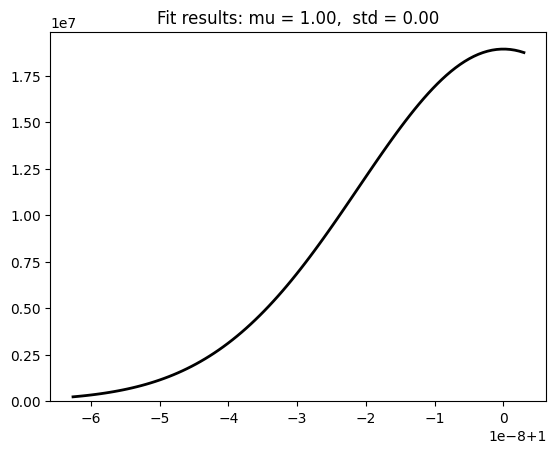

In [63]:
plt.hist(instagram_data['predicted_depression_label'], bins=25, density=True, alpha=0.6, color='g')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)
plt.show()
